In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
from IPython.display import display, Markdown
%matplotlib inline

In [2]:
# This is the data for all of Wisconsin.
url = "https://opendata.arcgis.com/datasets/5374188992374b318d3e2305216ee413_12.csv"
data = pd.read_csv(url, parse_dates=['DATE'], low_memory=False)

In [3]:
dc = data.groupby('NAME').get_group('Dunn').sort_values(by='DATE') # Select the data for Dunn County from the full data.
PNi = dc.columns.get_loc("POS_NEW")
dc['7_DAY'] = dc.iloc[:,PNi].rolling(window=7).mean() # Calculates the rolling 7-day average of new cases.
dc['14_DAY'] = dc.iloc[:,PNi].rolling(window=14).mean() # Calculates the rolling 14-day average of new cases.

In [4]:
display(Markdown('### Last updated: ' + dc.iloc[-1]['DATE'].strftime("%B %d, %Y")))

### Last updated: January 15, 2021

In [5]:
display(Markdown('# Dunn County has ' + str(dc.iloc[-1]['POSITIVE']) + ' total positive cases, with '+ str(int(dc.iloc[-1]['POS_NEW'])) + ' new cases reported today.'))

# Dunn County has 3812 total positive cases, with 18 new cases reported today.

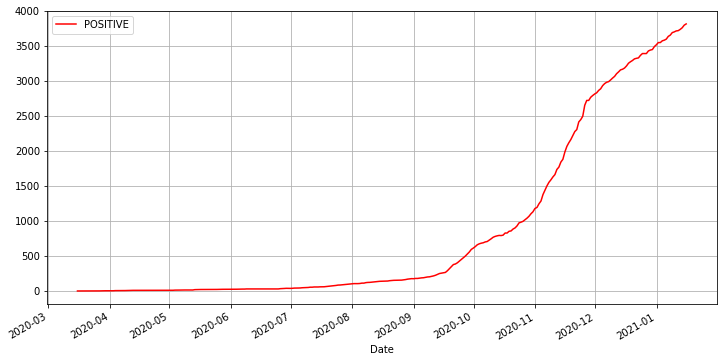

In [6]:
dc.plot(x='DATE',y='POSITIVE',color='red',grid='True',figsize=(12,6)).set_xlabel('Date');

## Figure 1: Cummulative number of positive cases.

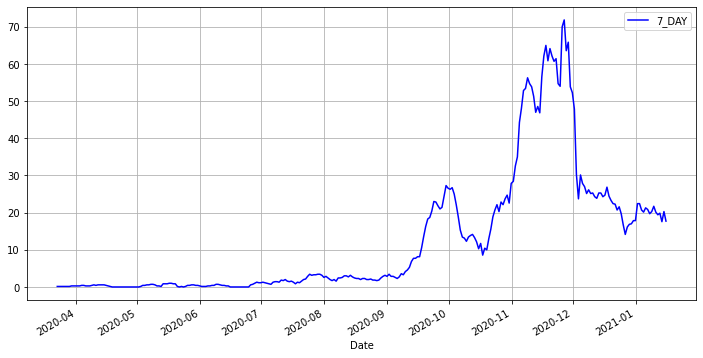

In [7]:
dc.plot(kind='line',x='DATE',y='7_DAY',color='blue',grid='True',figsize=(12,6)).set_xlabel('Date');

## Figure 2: Rolling 7-day average of daily new cases.

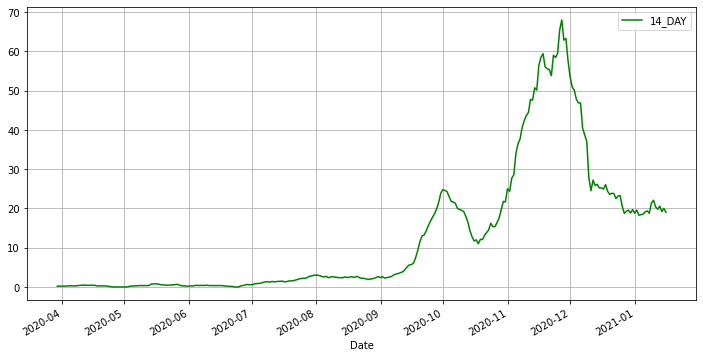

In [8]:
dc.plot(kind='line',x='DATE',y='14_DAY',color='green',grid='True',figsize=(12,6)).set_xlabel('Date');

## Figure 3: Rolling 14-day average of daily new cases.

Data source: [Wisconsin Department of Health Services](https://data.dhsgis.wi.gov/datasets/covid-19-historical-data-table/)

In [9]:
%%html
<style>
div.input {
    display:none;
}
</style>